<a href="https://colab.research.google.com/github/benyanko/DeepLearningAndAI/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digits Classification using ANN**
Take an input image (28x28 pixels) of a handwritten single digit (0–9) and classify the image as the appropriate digit.


In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# Load data


In [20]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() # data returns two tuple 
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize values ​​in the range of 0 to 1 

print("x_train shape: ", x_train.shape) 

x_train shape:  (60000, 28, 28)


# Build The Model

In [21]:
# First layer flattens the input.
# Dense layer with 128 units (hyperparameter selection) - dimensionality of the output space, activation ReLU - f(x)=max(0,x).
# Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
# Dense layer with 10 units for our 10 clasess (0-9), activation 'Softmax' - output is therefore a probability distribution (maps our output to a [0,1] range).

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


# Compile The Model

In [22]:
# Compile defines the loss function, the optimizer and the metrics.
# Adam optimization is a stochastic gradient descent method.
# Cost func is sparse_categorical_crossentropy because we expect labels to be provided as integers
# Metric functions is accuracy which calculates how often predictions equal labels

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train The Model

In [23]:
# Train data - x_train, y_train
# Validation data - x_test, y_test
# epochs=10 - "one pass over the entire dataset", used to separate training into distinct phases

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4789 - accuracy: 0.8599 - val_loss: 0.1393 - val_accuracy: 0.9580
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1564 - accuracy: 0.9544 - val_loss: 0.0986 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1095 - accuracy: 0.9659 - val_loss: 0.0850 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0837 - accuracy: 0.9744 - val_loss: 0.0757 - val_accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0724 - accuracy: 0.9764 - val_loss: 0.0701 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9807 - val_loss: 0.0751 - val_accuracy: 0.9767
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0692 - val_accuracy:

#Plots

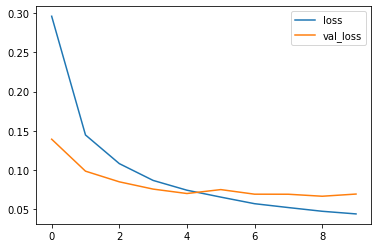

In [24]:
# Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

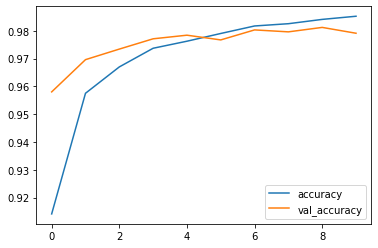

In [25]:
#plot accuracy per iteration

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [26]:
# Evaluate the model

print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0694 - accuracy: 0.9791
[0.06937950104475021, 0.9790999889373779]


Confusion Matrix, without Normalization
[[ 972    0    2    1    0    1    2    1    1    0]
 [   0 1122    3    2    0    0    2    0    6    0]
 [   2    1 1010    2    4    0    3    6    2    2]
 [   0    0    3  990    1    2    0    4    3    7]
 [   1    0    5    0  967    0    3    2    0    4]
 [   2    0    0    7    2  874    3    1    1    2]
 [   5    3    1    1    5    5  936    1    1    0]
 [   1    4    5    4    0    0    0 1009    1    4]
 [   6    0    1    6    4    9    1    6  936    5]
 [   1    4    0    5   13    3    0    8    0  975]]


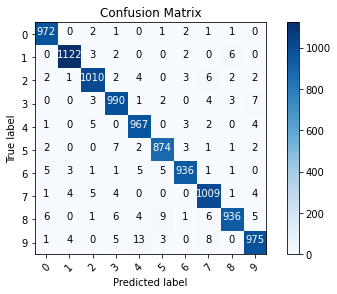

In [32]:
# Plot confusion matrix

# This function prints and plots the confusion matrix.
# Normalization can be applied by setting 'normalize=True'.

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print ("Normalizrd Confusion Matrix")
  else:
        print ("Confusion Matrix, without Normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



It can be seen that the results make sense.
The pairs that are easy to confuse are indeed digits whose visibility is very similar.
For example:
```
9 <--> 4
9 <--> 7
2 <--> 7
```





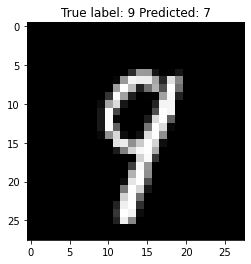

In [36]:
# Show some misclassified examples

misclassified_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));